# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [2]:
# import standard libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [78]:
# read data from '.csv' file
data = pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Part 2: Exploratory Data Analysis.

* ### Info

In [79]:
# print the full summary of the dataset  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* ### Head

In [80]:
# preview of the first 5 lines of the loaded data 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [81]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Encoding 'quality' attribute

In [82]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
data['quality'] = data.quality.apply(lambda q: 0 if q <=6 else 1)

In [83]:
# preview of the first 5 lines of the loaded data 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [84]:
data['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

<AxesSubplot:>

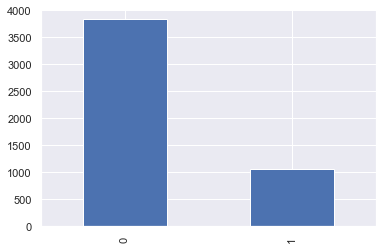

In [85]:
# visualisation plot
data['quality'].value_counts().plot(kind='bar')

* ### Resampling of an imbalanced dataset

In [86]:
# class count
count_class_0, count_class_1 = data.quality.value_counts()

# divide by class
class_0 = data[data['quality'] == 0]
class_1 = data[data['quality'] == 1]

* ### Random under-sampling of an imbalanced dataset

Random undersampling: 
1    1060
0    1060
Name: quality, dtype: int64


<AxesSubplot:title={'center':'Count(target)'}>

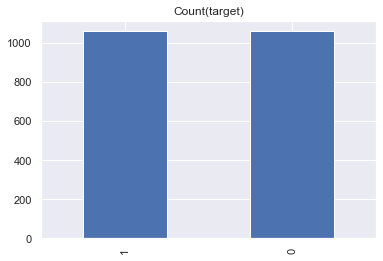

In [23]:
#class_0_under = class_0.sample(count_class_1)
#data_under = pd.concat([class_0_under, class_1], axis=0)

#print(f'Random undersampling: \n{data_under.quality.value_counts()}')

#data_under.quality.value_counts().plot(kind='bar', title='Count(target)')

* ### Random over-sampling of an imbalanced dataset

Random oversampling: 
1    3838
0    3838
Name: quality, dtype: int64


<AxesSubplot:title={'center':'Count(target)'}>

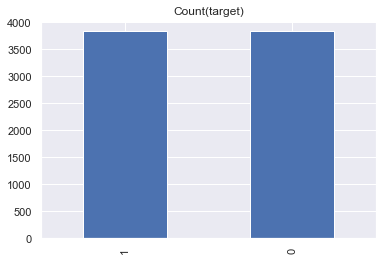

In [90]:
class_1_over = class_1.sample(count_class_0, replace=True)
data_over = pd.concat([class_0, class_1_over], axis=0)

print(f'Random oversampling: \n{data_over.quality.value_counts()}')

data_over.quality.value_counts().plot(kind='bar', title='Count(target)')

* ### Initialisation of target

In [91]:
target = data['quality']

#for undersampling
#target_under = data_under['quality']

#for oversampling
target_over = data_over['quality']

* ### Drop column 'quality'

In [92]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [33]:
#for undersampling
#data_under.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3188,6.1,0.17,0.29,1.1,0.041,32.0,92.0,0.99036,3.26,0.57,11.2,0
2494,7.3,0.20,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0,0
580,6.6,0.29,0.44,9.0,0.053,62.0,178.0,0.99685,3.02,0.45,8.9,0
3425,7.1,0.38,0.29,13.6,0.041,30.0,137.0,0.99461,3.02,0.96,12.1,0
2545,7.7,0.27,0.49,3.8,0.037,46.0,139.0,0.99116,3.04,0.38,11.6,0


In [93]:
#for oversampling
data_over.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [94]:
data = data.drop(columns=['quality'])

#for undersampling
#data_under = data_under.drop(['quality'], axis=1)

#for oversampling
data_over = data_over.drop(['quality'], axis=1)

In [95]:
#for undersampling
#data_under.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3188,6.1,0.17,0.29,1.1,0.041,32.0,92.0,0.99036,3.26,0.57,11.2
2494,7.3,0.20,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0
580,6.6,0.29,0.44,9.0,0.053,62.0,178.0,0.99685,3.02,0.45,8.9
3425,7.1,0.38,0.29,13.6,0.041,30.0,137.0,0.99461,3.02,0.96,12.1
2545,7.7,0.27,0.49,3.8,0.037,46.0,139.0,0.99116,3.04,0.38,11.6


In [96]:
#for oversampling
data_over.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [97]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [98]:
# StandardScaler 
sc = StandardScaler()

data_sc = sc.fit_transform(data)

#4 undersampling dataset
#data_sc = sc.fit_transform(data_under)

#4 oversampling dataset
data_sc = sc.fit_transform(data_over)

data_sc = pd.DataFrame(data_sc)
data_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.225257,-0.042250,0.267023,3.062255,0.109381,0.630152,0.912872,2.521360,-1.277116,-0.351321,-1.558957
1,-0.620372,0.260278,0.082559,-0.902754,0.318200,-1.329421,-0.039310,0.193575,0.667065,-0.022109,-1.027022
2,1.554102,0.058593,0.635952,0.197484,0.370405,-0.318028,-0.916319,0.559370,0.407841,-0.433624,-0.571077
3,0.466865,-0.445620,-0.101905,0.529632,0.788043,0.756576,1.313791,0.725640,-0.045802,-0.762837,-0.723059
4,0.466865,-0.445620,-0.101905,0.529632,0.788043,0.756576,1.313791,0.725640,-0.045802,-0.762837,-0.723059


In [99]:
data_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.225257,-0.042250,0.267023,3.062255,0.109381,0.630152,0.912872,2.521360,-1.277116,-0.351321,-1.558957
1,-0.620372,0.260278,0.082559,-0.902754,0.318200,-1.329421,-0.039310,0.193575,0.667065,-0.022109,-1.027022
2,1.554102,0.058593,0.635952,0.197484,0.370405,-0.318028,-0.916319,0.559370,0.407841,-0.433624,-0.571077
3,0.466865,-0.445620,-0.101905,0.529632,0.788043,0.756576,1.313791,0.725640,-0.045802,-0.762837,-0.723059
4,0.466865,-0.445620,-0.101905,0.529632,0.788043,0.756576,1.313791,0.725640,-0.045802,-0.762837,-0.723059


* ### Creating datasets for ML part

In [103]:
# set 'X' for features' and y' for the target ('quality').
#y = target
#X = data_sc.copy()

# for under-sampling dataset 
#y = target_under
#X = data_sc.copy()

# for over-sampling dataset 
y = target_over
X = data_sc.copy()

In [104]:
# preview of the first 5 lines of the loaded data 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.225257,-0.042250,0.267023,3.062255,0.109381,0.630152,0.912872,2.521360,-1.277116,-0.351321,-1.558957
1,-0.620372,0.260278,0.082559,-0.902754,0.318200,-1.329421,-0.039310,0.193575,0.667065,-0.022109,-1.027022
2,1.554102,0.058593,0.635952,0.197484,0.370405,-0.318028,-0.916319,0.559370,0.407841,-0.433624,-0.571077
3,0.466865,-0.445620,-0.101905,0.529632,0.788043,0.756576,1.313791,0.725640,-0.045802,-0.762837,-0.723059
4,0.466865,-0.445620,-0.101905,0.529632,0.788043,0.756576,1.313791,0.725640,-0.045802,-0.762837,-0.723059


* ### 'Train\Test' split

In [105]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [106]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((6140, 11), (6140,))

In [107]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((1536, 11), (1536,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [108]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

* ### Classification report

In [109]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.756098  0.687990  0.720437       766
           1   0.715137  0.779221  0.745805       770

    accuracy                       0.733724      1536
   macro avg   0.735617  0.733605  0.733121      1536
weighted avg   0.735564  0.733724  0.733154      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.898928  0.766319  0.827343       766
           1   0.797282  0.914286  0.851785       770

    accuracy                       0.840495      1536
   macro avg   0.848105  0.840302  0.839564      1536
weighted avg   0.847973  0.840495  0.839596      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.970760  0.866841  0.915862       766
           1   0.880282  0.974026  0.924784       770

    accuracy                       0.920573      1536
   macro avg   0.925521  0.920433  0.920323

* ### Confusion matrix

In [110]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

LR Confusion Matrix: 
 [[527 239]
 [170 600]]

KNN Confusion Matrix: 
 [[587 179]
 [ 66 704]]

DT Confusion Matrix: 
 [[664 102]
 [ 20 750]]



* ### ROC-AUC score

In [111]:
roc_auc_score(DT_pred, y_test)

0.9255209620294869

* ### Build, train and evaluate models with hyperparameters

In [112]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [113]:
# print the best hyper parameters set
print("Logistic Regression Best Hyper Parameters:   ", LR1.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)


Logistic Regression Best Hyper Parameters:    {'C': 4, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}
K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 5}
Decision Tree Best Hyper Parameters:          {'criterion': 'entropy', 'max_depth': 20, 'random_state': 0}


* ### Classification report

In [73]:
print("LR Classification Report: \n", classification_report(y_test, LR1_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN1_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT1_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.785000  0.707207  0.744076       222
           1   0.709821  0.787129  0.746479       202

    accuracy                       0.745283       424
   macro avg   0.747411  0.747168  0.745277       424
weighted avg   0.749184  0.745283  0.745221       424

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.821053  0.702703  0.757282       222
           1   0.717949  0.831683  0.770642       202

    accuracy                       0.764151       424
   macro avg   0.769501  0.767193  0.763962       424
weighted avg   0.771932  0.764151  0.763647       424

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.782828  0.698198  0.738095       222
           1   0.703540  0.787129  0.742991       202

    accuracy                       0.740566       424
   macro avg   0.743184  0.742663  0.740543

* ### Confusion matrix

DT Confusion Matrix


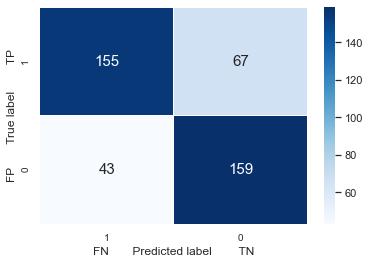

In [74]:
# confusion matrix of DT model
DT_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [115]:
roc_auc_score(DT1_pred, y_test)

0.9207896249152994

##  Conclusion.

In [114]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['quality'] = DT1_pred
sub.to_csv('WinePredictionsTest.csv', index=False)

**Question**: Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model).

**Answers**:

1. Binary classification was applied.

2. Classes were highly imbalanced with 78.36 % of '0' class and only 21.64 % of '1' class in our dataset. 

3. Three options were applied in order to calculate the best predictions:
    * Calculate predictions with imbalanced dataset
    * Calculate predictions with random under-sampling technique of an imbalanced dataset
    * Calculate predictions with random over-sampling technique of an imbalanced dataset
    
4. Three ML models were used: Logistic Regression, KNN, Decision Tree (without and with hyper parameters).

5. The best result was choosen: 
    * Random over-sampling dataset with 3838 enteties in class '0' and 3838 enteties in class '1', 7676 enteties in total.
    * Train/Test split: test_size=0.2, random_state=0
    * Decision Tree model without hyper parameters tuning, with an accuracy score equal 92.06 per cent and ROC-AUC score equal 92.55 per cent .